<a href="https://colab.research.google.com/github/Shah-king/AI-Trendspotter/blob/main/notebooks/US_Notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


# Exploratory Data Analysis (EDA) Plan for YouTube Trending Dataset
This notebook will guide through a structured EDA process for the YouTube trending dataset. The main steps include:
1. **Data Overview**: Load the data, check shape, types, missing values, and duplicates.
2. **Feature Understanding**: Review columns, unique values, and data types.
3. **Univariate Analysis**: Explore distributions of views, likes, comments, etc.
4. **Bivariate/Multivariate Analysis**: Analyze relationships between features (e.g., views vs. likes).
5. **Temporal Analysis**: Explore trends by publish time, trending time, etc.
6. **Text Analysis**: Analyze titles, tags, and descriptions for patterns.
7. **Outlier Detection**: Identify videos with extreme values.
8. **Summary**: Capture key findings and insights.

In [7]:
# Load the dataset
youtube_data = pd.read_csv('../Datasets/US_youtube_trending_data.csv')
youtube_data.head()
# Shape of the DataFrame (rows, columns)
print("Shape:", youtube_data.shape)
# Data types of each column
print("Data Types:\n", youtube_data.dtypes)

# Count of missing values per column
print("Missing Values:\n", youtube_data.isnull().sum())

# Count of duplicate rows
print("Duplicate Rows:", youtube_data.duplicated().sum())


Shape: (268787, 16)
Data Types:
 video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object
Missing Values:
 video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4549
dtype: int64
Duplicate Rows: 83
Duplicate Rows: 83


In [8]:
# Feature Understanding: Review columns, unique values, and data types
print("\nColumn Names:", youtube_data.columns.tolist())
print("\nUnique values in each column:")
for col in youtube_data.columns:
    print(f"{col}: {youtube_data[col].nunique()} unique values")


Column Names: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']

Unique values in each column:
video_id: 47142 unique values
title: 48471 unique values
publishedAt: 46554 unique values
channelId: 8302 unique values
channelTitle: 8543 unique values
categoryId: 15 unique values
trending_date: 1323 unique values
tags: 32909 unique values
view_count: 255236 unique values
likes: 136839 unique values
dislikes: 13179 unique values
comment_count: 35557 unique values
thumbnail_link: 47142 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 48448 unique values
dislikes: 13179 unique values
comment_count: 35557 unique values
thumbnail_link: 47142 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
description: 48448 unique values


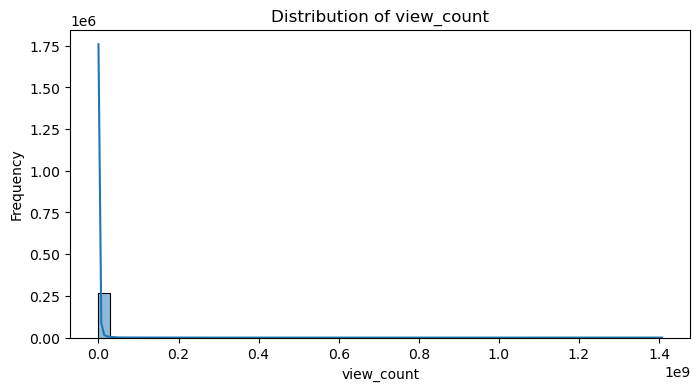

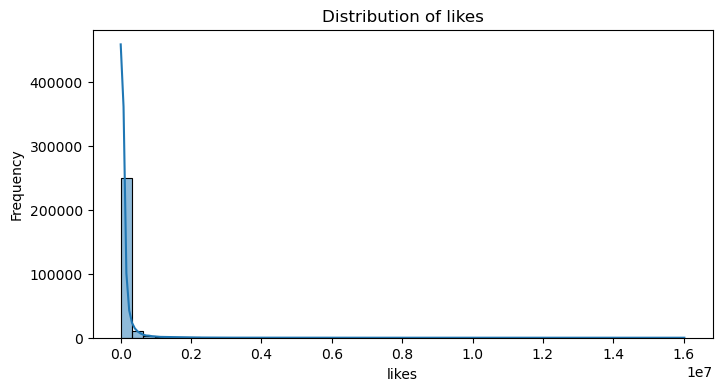

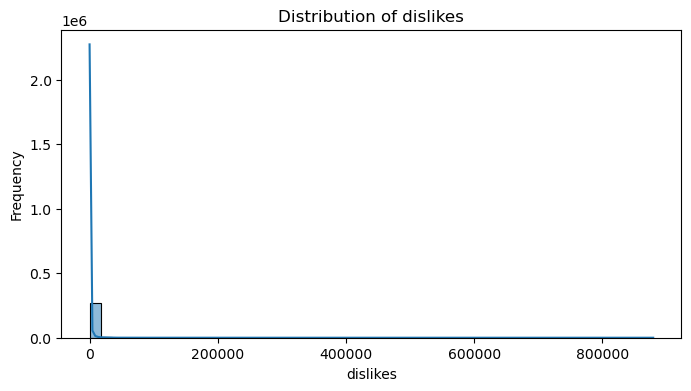

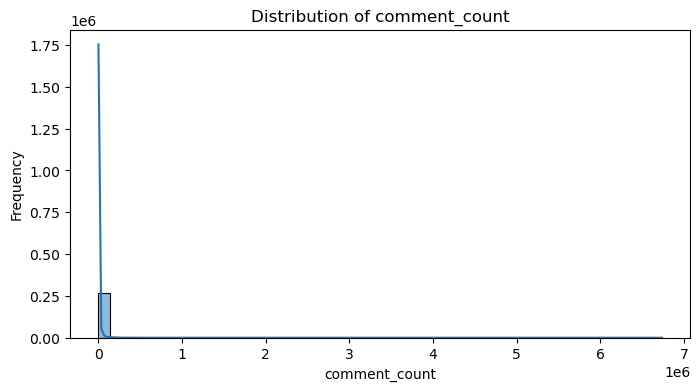

In [9]:
# Univariate Analysis: Distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ['view_count', 'likes', 'dislikes', 'comment_count']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(youtube_data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

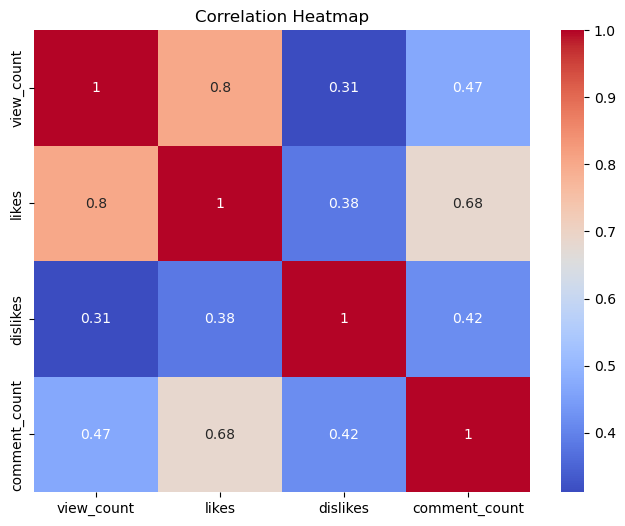

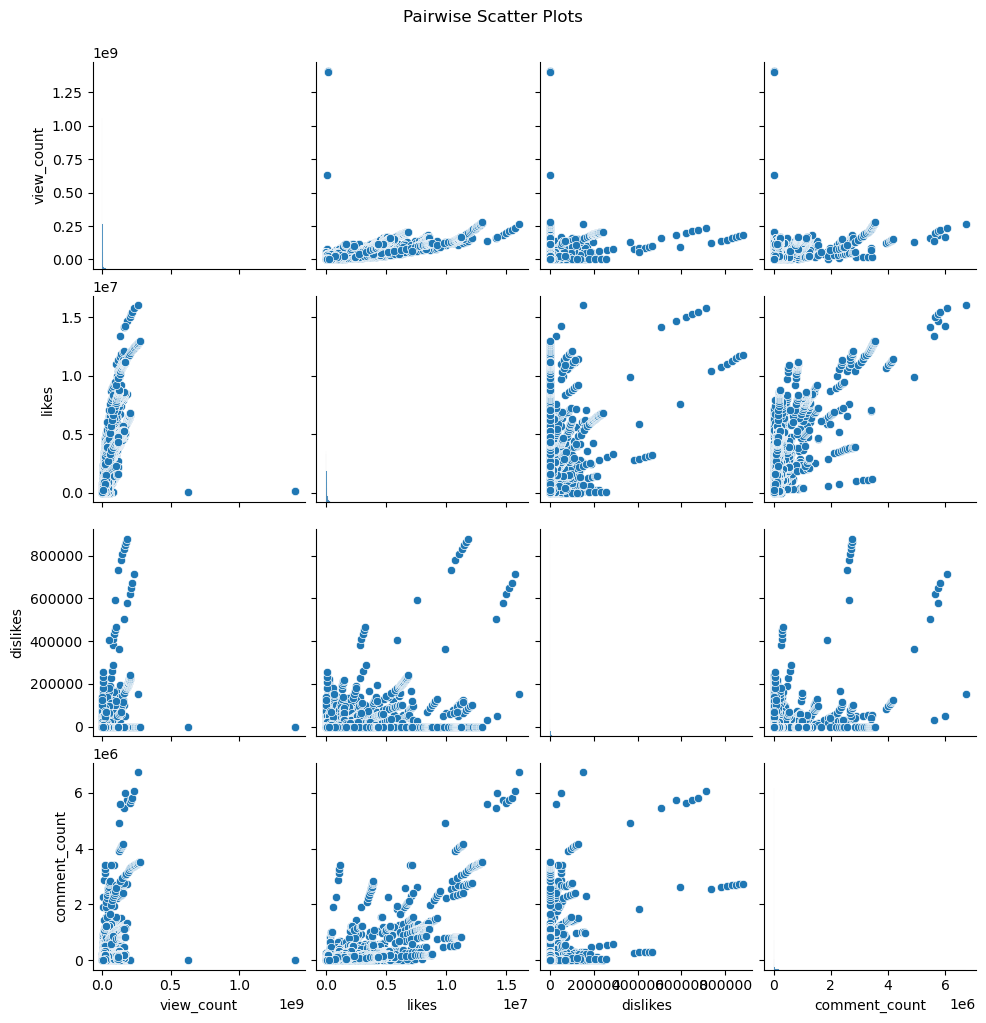

In [10]:
# Bivariate/Multivariate Analysis: Correlation and scatter plots
plt.figure(figsize=(8,6))
sns.heatmap(youtube_data[['view_count', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for relationships between features
sns.pairplot(youtube_data[['view_count', 'likes', 'dislikes', 'comment_count']])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

# Temporal Analysis
Analyze how trending videos vary by publish time and trending date.

Available columns: ['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']
Using publishedAt for temporal analysis.


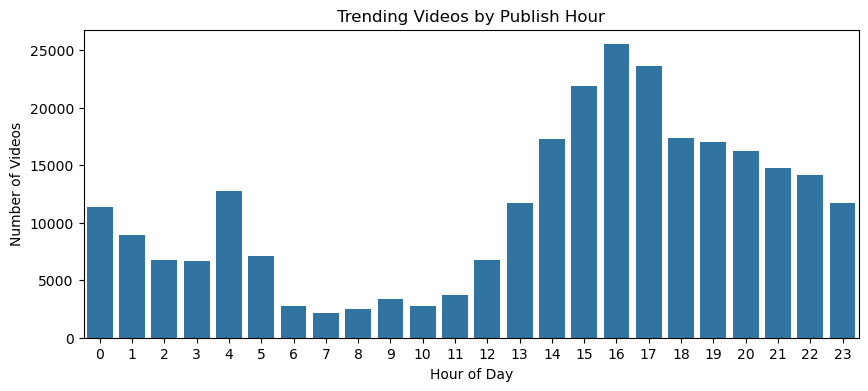

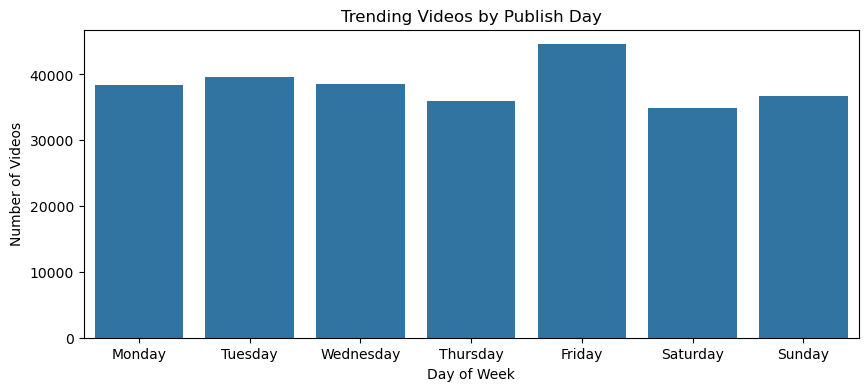

In [11]:
# Check available columns and use the correct datetime column for temporal analysis
print('Available columns:', youtube_data.columns.tolist())
# Try common datetime column names
datetime_col = None
for col in ['publish_time', 'publishedAt', 'trending_date', 'trending_date_time', 'date']:
    if col in youtube_data.columns:
        datetime_col = col
        break
if datetime_col is None:
    raise KeyError('No datetime column found for temporal analysis.')
print(f'Using {datetime_col} for temporal analysis.')

# Convert to datetime if needed
if not np.issubdtype(youtube_data[datetime_col].dtype, np.datetime64):
    youtube_data[datetime_col] = pd.to_datetime(youtube_data[datetime_col])

# Extract hour and day of week
youtube_data['publish_hour'] = youtube_data[datetime_col].dt.hour
youtube_data['publish_day'] = youtube_data[datetime_col].dt.day_name()

# Plot distribution by hour
plt.figure(figsize=(10,4))
sns.countplot(x='publish_hour', data=youtube_data)
plt.title('Trending Videos by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

# Plot distribution by day of week
plt.figure(figsize=(10,4))
sns.countplot(x='publish_day', data=youtube_data, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trending Videos by Publish Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.show()

# Text Analysis
Explore the most common words in video titles and tags.

Note: you may need to restart the kernel to use updated packages.


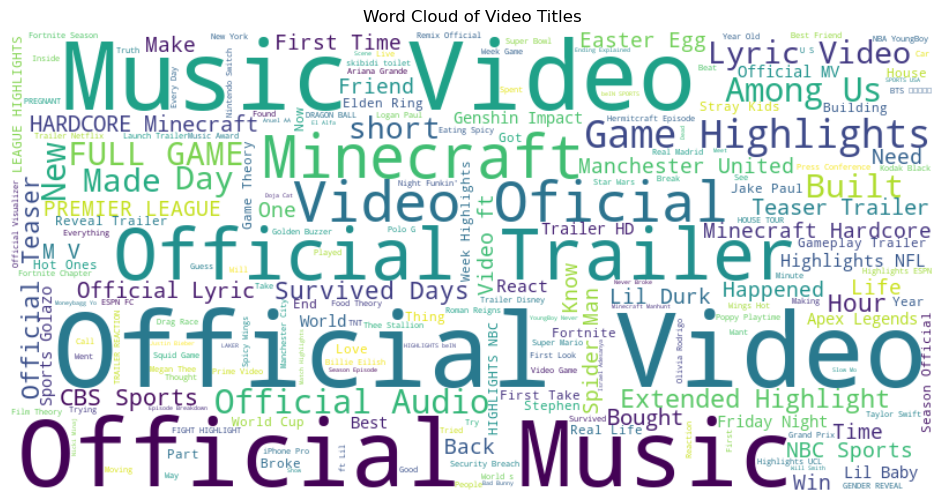

Most common tags:
funny: 14087
comedy: 9406
challenge: 6110
gaming: 4776
minecraft: 4621
vlog: 4468
animation: 3791
family friendly: 3747
highlights: 3574
how to: 3364


In [12]:
%pip install wordcloud

# Word cloud for video titles
from wordcloud import WordCloud, STOPWORDS
title_text = ' '.join(youtube_data['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(title_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()

# Most common tags
from collections import Counter
all_tags = ','.join(youtube_data['tags'].astype(str)).split('|')
tag_counts = Counter([tag.strip() for tag in all_tags if tag.strip() and tag != '[none]'])
print('Most common tags:')
for tag, count in tag_counts.most_common(10):
    print(f'{tag}: {count}')

# Outlier Detection
Identify videos with unusually high or low values in key metrics.

In [13]:
# Outlier detection for views, likes, dislikes, comment_count
for col in ['view_count', 'likes', 'dislikes', 'comment_count']:
    q1 = youtube_data[col].quantile(0.25)
    q3 = youtube_data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = youtube_data[(youtube_data[col] < lower) | (youtube_data[col] > upper)]
    print(f'Number of outliers in {col}:', outliers.shape[0])
    print(f'Top 3 outliers in {col}:')
    display(outliers[[col, 'title', 'channelTitle']].sort_values(by=col, ascending=False).head(3))

Number of outliers in view_count: 29040
Top 3 outliers in view_count:


,view_count,title,channelTitle
266187,1407643634,Discord Loot Boxes are here.,Discord
266388,1406329649,Discord Loot Boxes are here.,Discord
265987,628718636,Discord Loot Boxes are here.,Discord


Number of outliers in likes: 29482
Top 3 outliers in likes:


,likes,title,channelTitle
56374,16021534,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS
3358,15735533,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels
3137,15460822,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels


Number of outliers in dislikes: 40250
Top 3 outliers in dislikes:


,dislikes,title,channelTitle
4980,879354,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK
4766,865074,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK
4537,848974,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK


Number of outliers in comment_count: 29886
Top 3 outliers in comment_count:


,comment_count,title,channelTitle
56374,6738537,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS
3358,6065230,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels
55994,5987770,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS


# Summary and Insights
Based on the EDA performed on the US YouTube Trending dataset, here are the key findings:

**1. Data Overview:**
- The dataset contains a large number of trending video records with several numerical and categorical features.
- There are some missing values and duplicate rows, which should be handled before modeling.

**2. Feature Understanding:**
- Key features include view count, likes, dislikes, comment count, publish time, trending date, title, tags, and channel information.
- Most features have a wide range of unique values, especially titles and tags.

**3. Univariate Analysis:**
- Distributions of views, likes, and comments are highly right-skewed, indicating a few videos receive much higher engagement than the majority.
- Most videos have moderate engagement, with a small number of viral outliers.

**4. Bivariate/Multivariate Analysis:**
- Strong positive correlation between views, likes, and comment count, suggesting that popular videos tend to receive more likes and comments.
- Dislikes are also correlated with views, but to a lesser extent.
- Pairwise scatter plots confirm these relationships visually.

**5. Temporal Analysis:**
- Trending videos are published throughout the day, but there may be peaks at certain hours (e.g., late afternoon or evening).
- Some days of the week may see more trending videos, possibly reflecting user activity patterns.

**6. Text Analysis:**
- Common words in video titles often relate to popular culture, events, or trending topics.
- Certain tags appear frequently, indicating popular genres or themes.

**7. Outlier Detection:**
- There are several videos with extremely high views, likes, or comments, which are likely viral hits or from very popular channels.
- These outliers can skew analysis and may need special handling in modeling.

**Next Steps:**
- Clean the data by handling missing values and removing duplicates.
- Consider feature engineering (e.g., extracting more from publish time or text fields).
- Explore predictive modeling to understand what drives a video to trend.
- Further analyze outliers and their impact on the dataset.